In [1]:
import sys
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from pathlib import Path
import matplotlib.ticker as mticker

from forecasts import for_netcdf_encoding

In [157]:
ds = xr.open_dataset('/nobackup/users/straaten/EXT_extra/45r1/hin_2012-04-18_processed.nc')

#### Usable for swvl in and z300 above the target region

In [158]:
ds['swvl13'].loc[:,slice(51.5,45.5),slice(4.5,13.5),:] = 5
ds['swvl13'].loc[:,slice(48.5,44),slice(0,6),:] = 5
ds['swvl13'].loc[:,slice(53,50),slice(7.5,18),:] = 5
ds['swvl13'].loc[:,slice(53,51.5),slice(18,19.5),:] = 5
ds['swvl13'].loc[:,48.5,-1.5,:] = 5
ds['swvl13'].loc[:,48.5,15,:] = 5
ds['swvl13'].loc[:,51.5,4.5,:] = 0
ds['swvl13'].loc[:,45.5,13.5,:] = 0

#ds['swvl13'].loc[:,slice(48.5,47),slice(6,7.5),:] = 1
#ds['swvl13'].loc[:,slice(50,48.5),slice(6,7.5),:] = 1

In [159]:
ds['swvl13'].loc[:,slice(48.5,42.5),slice(21,25.5),:] = 6
ds['swvl13'].loc[:,slice(47,45.5),slice(16.5,21),:] = 6
ds['swvl13'].loc[:,slice(44,44),slice(19.5,19.5),:] = 6
ds['swvl13'].loc[:,slice(42.5,41),slice(22.5,25.5),:] = 6

In [160]:
ds['swvl13'].loc[:,slice(42.5,39.5),slice(-7.5,-1.5),:] = 7
ds['swvl13'].loc[:,slice(39.5,38),slice(-6,-4.5),:] = 7

In [161]:
ds['swvl13'].loc[:,slice(62,60.5),slice(9,16.5),:] = 8
ds['swvl13'].loc[:,60.5,7.5,:] = 8
ds['swvl13'].loc[:,63.5,12,:] = 8
ds['swvl13'].loc[:,65,18,:] = 8
ds['swvl13'].loc[:,59,13.5,:] = 8
ds['swvl13'].loc[:,59,15,:] = 8
ds['swvl13'].loc[:,slice(65,63.5),slice(13.5,16.5),:] = 8

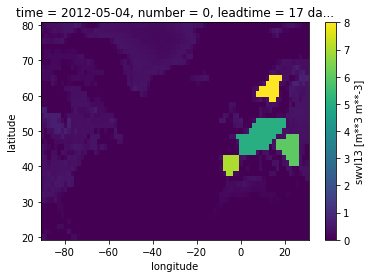

In [162]:
ds['swvl13'][16,:,:,0].plot()

In [163]:
temp = ds['swvl13'].where(ds['swvl13'] >=1, other = np.nan)[0,:,:,0]
temp.name = 'clustid'
temp = temp.drop(['time','number','leadtime'])
temp.attrs = {'units':''}
temp = temp.expand_dims('dissim_threshold')
temp = temp.assign_coords({'dissim_threshold':np.array([1], dtype = np.int64)}).sortby('latitude') # forecasts are differently indexed than observations
temp.latitude.attrs['units'] = 'degrees_north'
temp.longitude.attrs['units'] = 'degrees_east'

In [164]:
# cropping domain a bit to europe (ERA5 Land)
temp = temp.sel(latitude = slice(30,75), longitude = slice(-30,40)).to_dataset()

In [165]:
particular_encoding = {key : for_netcdf_encoding[key] for key in temp.variables.keys()}
temp.to_netcdf('/nobackup/users/straaten/clusters/swvl-local.nc', encoding=particular_encoding)

#### Usable for SST

Osso (2020). northwestern box (42–52N, 52–40W) southeastern box
(35–42N, 35–20W).

In [166]:
#ds['sst'].loc[:,slice(52,42),slice(-52,-40),:] = 0
#ds['sst'].loc[:,slice(42,35),slice(-35,-20),:] = 1
#ds['sst'].loc[:,slice(52,42),slice(-39,-26),:] = 2
#ds['sst'].loc[:,slice(59,54.5),slice(1.5,4.5),:] = 3
#ds['sst'].loc[:,slice(32,26),slice(-31,-20),:] = 4

ds['sst'].loc[:,slice(59,54.5),slice(1.5,4.5),:] = 1
ds['sst'].loc[:,slice(59,56),0,:] = 1
ds['sst'].loc[:,56,6,:] = 1

In [167]:
ds['sst'].loc[:,slice(47,44),slice(-9,-3),:] = 2
ds['sst'].loc[:,slice(51.5,48.5),slice(-9,-6),:] = 2
ds['sst'].loc[:,50,slice(-4.5,-3),:] = 2

In [168]:
ds['sst'].loc[:,slice(41,38),slice(1.5,7.5),:] = 3
ds['sst'].loc[:,39.5,3,:] = 300
ds['sst'].loc[:,slice(41,39.5),slice(10.5,13.5),:] = 3
ds['sst'].loc[:,41,13.5,:] = 300
ds['sst'].loc[:,42.5,slice(6,7.5),:] = 3
ds['sst'].loc[:,38,slice(9,12),:] = 3
ds['sst'].loc[:,slice(36.5,33.5),slice(12,21),:] = 3
ds['sst'].loc[:,slice(39.5,38),slice(18,19.5),:] = 3
ds['sst'].loc[:,38,16.5,:] = 3


In [169]:
ds['sst'].loc[:,slice(62,57.5),slice(19.5,21),:] = 4
ds['sst'].loc[:,slice(57.5,56),slice(18,19.5),:] = 4
ds['sst'].loc[:,56,slice(15,16.5),:] = 4

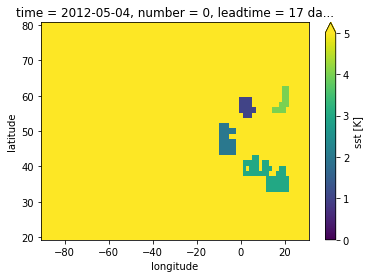

In [170]:
ds['sst'][16,:,:,0].plot(vmin = 0, vmax = 5)

In [171]:
temp = ds['sst'].where(ds['sst'] <= 5, other = np.nan)[0,:,:,0]
temp.name = 'clustid'
temp = temp.drop(['time','number','leadtime'])
temp.attrs = {'units':''}
temp = temp.expand_dims('dissim_threshold')
temp = temp.assign_coords({'dissim_threshold':np.array([1], dtype = np.int64)}).sortby('latitude').to_dataset() # forecasts are differently indexed than observations
temp.latitude.attrs['units'] = 'degrees_north'
temp.longitude.attrs['units'] = 'degrees_east'

In [172]:
particular_encoding = {key : for_netcdf_encoding[key] for key in temp.variables.keys()}
temp.to_netcdf('/nobackup/users/straaten/clusters/sst-local.nc', encoding=particular_encoding)

### Custom Temperature cluster
For testing the accidental (?) good skills in grid-point 

In [8]:
basepath = Path('/nobackup/users/straaten/clusters/')
template = xr.open_dataarray(basepath / 't2m-q075.nc')[[0]]

In [19]:
latlonpoints = {'ned':(51.5,5.75),
                'france':(46.75,2.75),
                'german':(51,12.25),
                'uk':(52,-1.25),
                'balkan':(47.5,19),
                'spain':(40,4.75)}
template[:,:,:] = np.nan
for i, (lat,lon) in enumerate(latlonpoints.values()):
    template.loc[:,lat,lon] = i

In [23]:
template.to_netcdf(basepath / 't2m-grid.nc')

### plotting clusters

In [2]:
terra = xr.open_dataarray('/nobackup/users/straaten/clusters/swvl-local.nc')
sea = xr.open_dataarray('/nobackup/users/straaten/clusters/sst-local.nc')
target = xr.open_dataarray('/nobackup/users/straaten/clusters/t2m-q095-adapted.nc')
target = target.where(target == 9, np.nan)

In [11]:
def data_for_pcolormesh(array, shading:str):
    """Xarray array to usuable things"""
    lats = array.latitude.values # Interpreted as northwest corners (90 is in there)
    lons = array.longitude.values # Interpreted as northwest corners (-180 is in there, 180 not)
    if shading == 'flat':
        lats = np.concatenate([lats[[0]] - np.diff(lats)[0], lats], axis = 0) # Adding the sourthern edge 
        lons = np.concatenate([lons, lons[[-1]] + np.diff(lons)[0]], axis = 0)# Adding the eastern edge (only for flat shating)
    return lons, lats, array.values.squeeze()

def add_clustid_midpoint(array, ax, transform):
    """For each clustid adds its integer id as text to the latlon midpoint"""
    ids = np.unique(array.values)
    ids = ids[~np.isnan(ids)]
    for i in ids:
        x = array.where(array == i, drop = True).longitude.mean()
        y = array.where(array == i, drop = True).latitude.mean()
    
        ax.text(x, y, str(int(i)),size = 'large',c = 'white',horizontalalignment='center',verticalalignment = 'center',transform=transform)
    return ax

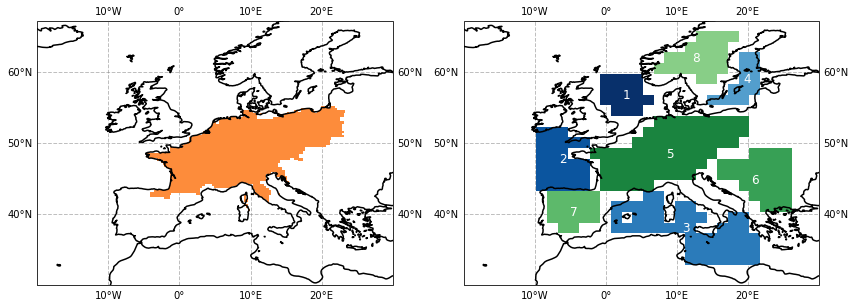

In [9]:
array_crs = ccrs.PlateCarree()
proj_crs = ccrs.PlateCarree()
fig, axes = plt.subplots(subplot_kw = {'projection':proj_crs}, ncols = 2, figsize = (14,8), facecolor = 'white')
#ax.add_feature(cfeature.OCEAN, zorder=0)
#ax.add_feature(cfeature.LAND, zorder=0, color = 'olivedrab', alpha = 0.8)
shading = 'nearest'

axes[0].pcolormesh(*data_for_pcolormesh(target, shading = shading), zorder = 1, shading = shading, 
              transform = array_crs, cmap = 'Oranges', vmin = 8, vmax = 10)

axes[1].pcolormesh(*data_for_pcolormesh(sea, shading = shading), zorder = 2, shading = shading, 
              transform = array_crs, cmap = 'Blues_r', vmax = sea.max()+4)
axes[1] = add_clustid_midpoint(sea, ax = axes[1], transform = array_crs)

axes[1].pcolormesh(*data_for_pcolormesh(terra, shading = shading), zorder = 2, shading = shading, 
              transform = array_crs, cmap = 'Greens_r', vmin = 3, vmax = terra.max() + 4)
axes[1] = add_clustid_midpoint(terra, ax = axes[1], transform = array_crs)
# Adding the baltic sea manually, as centered number falls ouside the colored box:
axes[1].text(20, 59, str(4),size = 'large',c = 'white',horizontalalignment='center',verticalalignment = 'center',transform=array_crs)

for ax in axes:
    gl = ax.gridlines(draw_labels=True, zorder = 0, dms=True, x_inline=False, y_inline=False, crs = ccrs.PlateCarree(),
              linewidth=1, color='gray', alpha=0.5, linestyle='--')

    ax.coastlines(zorder = 3, lw = 1.5)
    ax.set_extent((-20,30,30,65))

    x_at = np.arange(-10,40,10)
    y_at = np.arange(30,70,10)
    gl.xlocator = mticker.FixedLocator(x_at)
    gl.ylocator = mticker.FixedLocator(y_at)

    #ax.set_xticks(x_at)
    #ax.set_xticklabels(gl.xformatter.format_ticks(x_at))
    #ax.set_yticks(y_at)
    #ax.set_yticklabels(gl.yformatter.format_ticks(y_at))
plt.savefig(os.path.expanduser('~/Pictures/domains.pdf'))
plt.show()
target.close()
terra.close()
sea.close()

## Plotting t850 predictor

In [7]:
lag = -(15 + 21)
t850 = xr.open_dataset('/nobackup_1/users/straaten/clusters_cv_spearmanpar_varalpha_strict/t850_nhblock.21.corr.nc', decode_times= False)

In [8]:
field = t850['clustid'].sel(lag = lag, fold = 4)

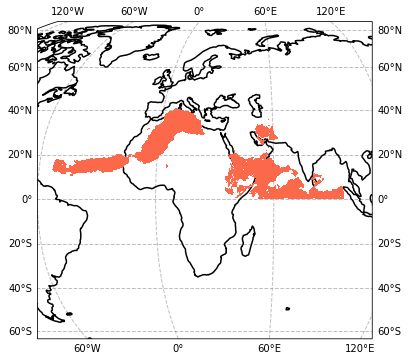

In [52]:
array_crs = ccrs.PlateCarree()
proj_crs = ccrs.Robinson(central_longitude=50)
fig, ax = plt.subplots(subplot_kw = {'projection':proj_crs}, ncols = 1, figsize = (6,6), facecolor = 'white') # figsize = (7,3),
#ax.add_feature(cfeature.OCEAN, zorder=0)
#ax.add_feature(cfeature.LAND, zorder=0, color = 'olivedrab', alpha = 0.8)
shading = 'nearest'
ax.pcolormesh(*data_for_pcolormesh(field, shading = shading), zorder = 3, shading = shading, 
              transform = array_crs, cmap = 'Reds', vmin = -2, vmax = 2)
gl = ax.gridlines(draw_labels=True, zorder = 1, dms=True, x_inline=False, y_inline=False, crs = ccrs.PlateCarree(),
              linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines(zorder = 2, lw = 1.5)
ax.set_extent((-60,110,-10,60))
plt.savefig(os.path.expanduser('~/Pictures/t850_region.pdf'))